In [ ]:
#Please contact Cheng Ren at cheng.ren@berkeley.edu for any questions

In [1]:
#set to root directory

In [2]:
cd ~

/Users/chengren


In [3]:
#import packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, select
import seaborn as sns


In [4]:
#connect to the db, please REVISE the path accordingly
path  = 'sqlite:///Downloads/dssg/sss.sqlite'
engine = create_engine(path, echo=True)
sqlite_connection = engine.connect()

In [5]:
#check tables in the db
engine.table_names()

2022-08-18 14:28:45,868 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-08-18 14:28:45,869 INFO sqlalchemy.engine.Engine [raw sql] ()


/var/folders/9y/0_t4dgms057d2y8rwm399t3w0000gp/T/ipykernel_32569/4132173468.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['arpa',
 'city',
 'geo_identifier',
 'health_care',
 'miscellaneous',
 'puma',
 'report',
 'self_sufficiency_standard']

In [6]:
#retrieve city data from the city table from db 
city = pd.read_sql("select * from city",con=engine)

2022-08-18 14:28:45,875 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("select * from city")
2022-08-18 14:28:45,876 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-18 14:28:45,876 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("select * from city")
2022-08-18 14:28:45,877 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-18 14:28:45,878 INFO sqlalchemy.engine.Engine select * from city
2022-08-18 14:28:45,878 INFO sqlalchemy.engine.Engine [raw sql] ()


In [7]:
city.head()

,state,place,sss_city,census_name,population,public_transit
0,AL,Mobile County,"Mobile, AL",Mobile city,184952,0
1,AL,Jefferson County,"Birmingham, AL",Birmingham city,197575,0
2,AL,Limestone County,"Athens, AL",Athens city,27027,0
3,AZ,Maricopa County,"Phoenix, AZ",Phoenix city,1624569,0
4,AZ,Pima County,"Tucson, AZ",Tucson city,543242,0


In [8]:
# Retrieve sss data from the self_sufficiency_standard table from db 
# To retrieve the data of interests faster, you can add conditions in the sql query
# Here I am only interested in these five types 'a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0'
sss = pd.read_sql("SELECT * FROM self_sufficiency_standard where family_type in ('a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0') ",con=engine)

2022-08-18 14:28:45,894 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM self_sufficiency_standard where family_type in ('a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0') ")
2022-08-18 14:28:45,894 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-18 14:28:45,895 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM self_sufficiency_standard where family_type in ('a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0') ")
2022-08-18 14:28:45,895 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-18 14:28:45,896 INFO sqlalchemy.engine.Engine SELECT * FROM self_sufficiency_standard where family_type in ('a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0') 
2022-08-18 14:28:45,897 INFO sqlalchemy.engine.Engine [raw sql] ()


In [9]:
sss.head()

,family_type,state,place,year,analysis_type,adult,infant,preschooler,schoolager,teenager,...,earned_income_tax_credit,child_care_tax_credit,child_tax_credit,hourly_self_sufficiency_wage,monthly_self_sufficiency_wage,annual_self_sufficiency_wage,emergency_savings,miscellaneous_is_secondary,health_care_is_secondary,analysis_is_secondary
0,a1i0p0s0t0,AR,Arkansas County,2022,Full,1,0,0,0,0,...,0.0,0.0,0.0,11.04,1942.84,23314.03,48.40,1,1,0
1,a1i0p0s0t0,AR,Ashley County,2022,Full,1,0,0,0,0,...,0.0,0.0,0.0,11.39,2004.68,24056.14,49.53,1,1,0
2,a1i0p0s0t0,AR,Baxter County,2022,Full,1,0,0,0,0,...,0.0,0.0,0.0,11.24,1977.79,23733.42,49.04,1,1,0
3,a1i0p0s0t0,AR,Benton County,2022,Full,1,0,0,0,0,...,0.0,0.0,0.0,12.58,2213.80,26565.63,54.40,1,1,0
4,a1i0p0s0t0,AR,Boone County,2022,Full,1,0,0,0,0,...,0.0,0.0,0.0,11.04,1943.73,23324.74,48.42,1,1,0


In [10]:
# Pick city of interests
city_sub = city[city['census_name'].isin(['Denver city','Boston city','Charlotte city','Seattle city'])]

In [11]:
city_sub

,state,place,sss_city,census_name,population,public_transit
25,CO,Denver County,"Denver, CO**",Denver city,711463,1
71,MA,Boston city,"Boston, MA**",Boston city,654776,1
110,NC,Mecklenburg County,"Charlotte, NC",Charlotte city,879709,0
157,WA,King County (Seattle),"Seattle, WA**",Seattle city,733919,1


In [12]:
# merge sss and city data by state and place columns
city_sub_sss = city_sub.merge(sss,left_on = ['state','place'], right_on = ['state','place'], how='left')

In [13]:
city_sub_sss

,state,place,sss_city,census_name,population,public_transit,family_type,year,analysis_type,adult,...,earned_income_tax_credit,child_care_tax_credit,child_tax_credit,hourly_self_sufficiency_wage,monthly_self_sufficiency_wage,annual_self_sufficiency_wage,emergency_savings,miscellaneous_is_secondary,health_care_is_secondary,analysis_is_secondary
0,CO,Denver County,"Denver, CO**",Denver city,711463,1,a1i0p0s0t0,2018,Full,1,...,0.0,0.0,0.00,12.51,2202.46,26429.56,48.84,0,1,0
1,CO,Denver County,"Denver, CO**",Denver city,711463,1,a1i0p0s0t0,2019,Partial,1,...,0.0,0.0,0.00,13.10,2305.51,27666.17,50.62,0,1,0
2,CO,Denver County,"Denver, CO**",Denver city,711463,1,a1i0p0s0t0,2020,Partial,1,...,0.0,0.0,0.00,13.60,2393.93,28727.17,52.19,0,1,0
3,CO,Denver County,"Denver, CO**",Denver city,711463,1,a1i0p0s0t0,2021,Full,1,...,0.0,0.0,0.00,14.19,2497.68,29972.19,44.98,0,1,0
4,CO,Denver County,"Denver, CO**",Denver city,711463,1,a1i0p0s0t0,2022,Full,1,...,0.0,0.0,0.00,16.28,2866.09,34393.11,76.86,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,WA,King County (Seattle),"Seattle, WA**",Seattle city,733919,1,a2i0p1s1t0,2022,Partial,2,...,0.0,-100.0,-333.33,21.31,7501.31,90015.70,165.16,0,1,0
91,WA,King County (Seattle),"Seattle, WA**",Seattle city,733919,1,a2i1p1s1t0,2019,Partial,2,...,0.0,-100.0,-500.00,31.33,11026.96,132323.57,185.06,0,1,0
92,WA,King County (Seattle),"Seattle, WA**",Seattle city,733919,1,a2i1p1s1t0,2020,Full,2,...,0.0,-100.0,-500.00,31.15,10963.18,131558.16,250.33,0,1,0
93,WA,King County (Seattle),"Seattle, WA**",Seattle city,733919,1,a2i1p1s1t0,2021,Partial,2,...,0.0,-100.0,-500.00,31.08,10939.05,131268.62,250.81,0,1,0


<AxesSubplot:xlabel='year', ylabel='annual_self_sufficiency_wage'>

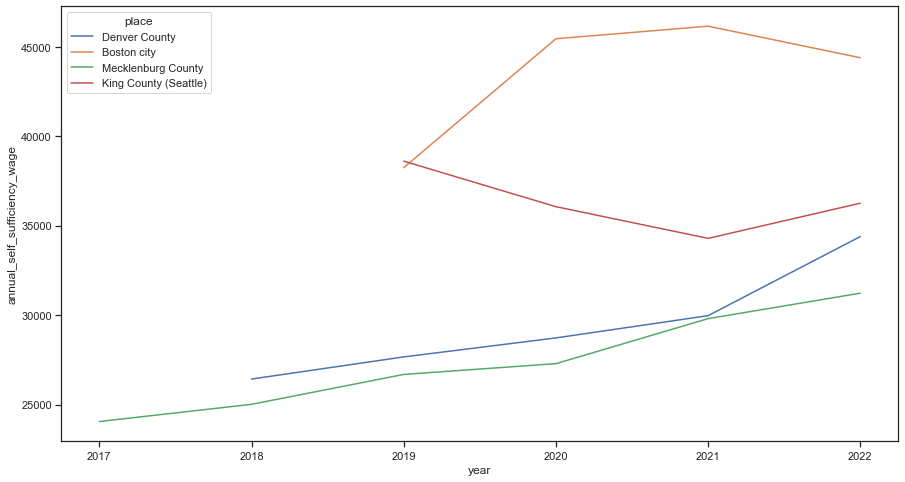

In [14]:
#draw lineplot of annual sufficiency wage of a1i0p0s0t0 by city
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("ticks")
sns.lineplot(data=city_sub_sss[(city_sub_sss['family_type']=='a1i0p0s0t0')], x="year", y="annual_self_sufficiency_wage",hue='place')

<AxesSubplot:xlabel='year', ylabel='annual_self_sufficiency_wage'>

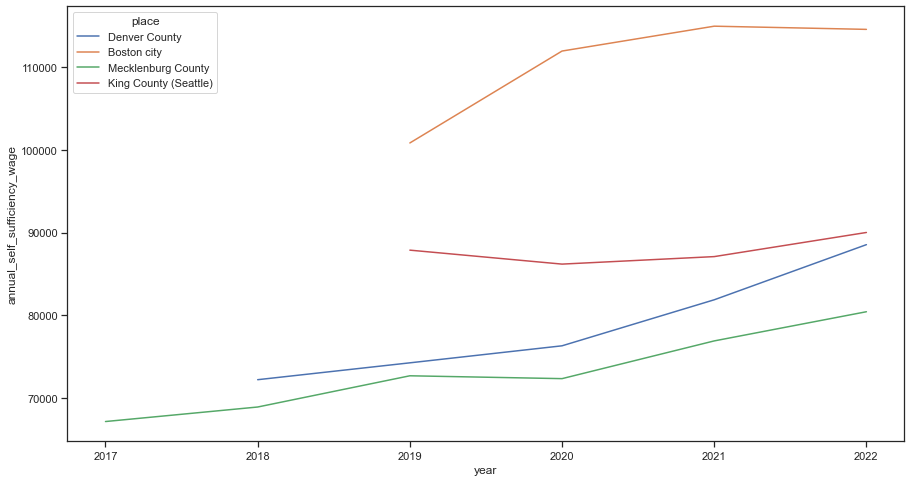

In [15]:
#draw lineplot of annual sufficiency wage of a2i0p1s1t0
sns.lineplot(data=city_sub_sss[(city_sub_sss['family_type']=='a2i0p1s1t0')], x="year", y="annual_self_sufficiency_wage",hue='place')

In [16]:
# prepare data for city comparsion by years and family types. 
# Here we are going to compare year 2019,2020,2021,2022 and 
# family type 'a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0'
analysis_fam_type = city_sub_sss[(city_sub_sss['family_type'].isin(['a1i0p0s0t0','a1i0p1s0t0','a1i0p1s1t0','a2i0p1s1t0','a2i1p1s1t0']))&
                                (city_sub_sss['year'].isin([2019,2020,2021,2022]))]

In [17]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

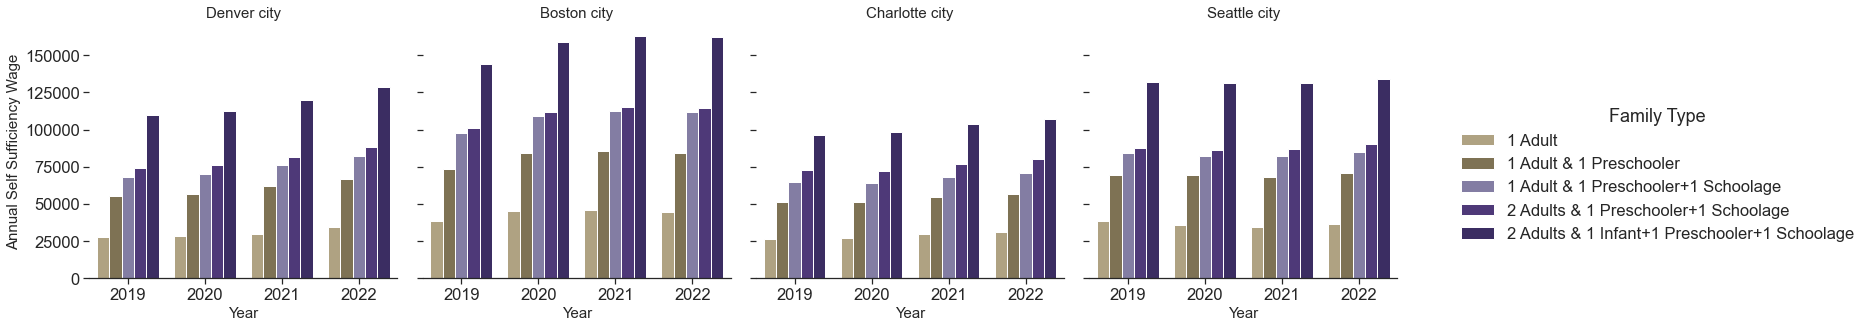

In [18]:
#Draw plot for different categories
# hue: color difference by which type
# col_wrap: how many plot for each row. If you have 4 plots but set col_wrap=2, then the plot is in 2*2 format
g = sns.catplot(x="year", y="annual_self_sufficiency_wage",
                hue="family_type", col="census_name",
                data=analysis_fam_type, kind="bar",col_wrap=4,
                height=5, aspect=1,
                #if you would like to use your own color
                palette = ['#b7a57a','#85754d','#7e76aa','#4b2e83','#37246b']);
                #if you use default color
                #palette = 'Set3');
# Change axis labels
(g.set_axis_labels("Year", "Annual Self Sufficiency Wage",size=15)
.set_titles("{col_name}",size=15)
.despine(left=True))

#change legend title
new_title = 'Family Type'
g._legend.set_title(new_title)

#replace labels
new_labels = ['1 Adult', '1 Adult & 1 Preschooler','1 Adult & 1 Preschooler+1 Schoolage','2 Adults & 1 Preschooler+1 Schoolage','2 Adults & 1 Infant+1 Preschooler+1 Schoolage']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
# move the legnd to the appropriate location     
sns.move_legend(g, "upper right", bbox_to_anchor=(1.2, .7))

In [19]:
# save to image to the local, plrase revise the path for your own device
g.savefig('Downloads/city_comp3.png',dpi=500,transparent=True)